In [3]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import os

In [4]:
df = pd.read_csv('heart_nor.csv')
print(df.shape)

(1025, 14)


In [5]:
print(df.head(3))

        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167    1  0.0  0.292453  0.196347    0      0.5  0.740458      0   
1  0.500000    1  0.0  0.433962  0.175799    1      0.0  0.641221      1   
2  0.854167    1  0.0  0.481132  0.109589    0      0.5  0.412214      1   

    oldpeak  slope   ca  thal  target  
0  0.161290    1.0  0.5   1.0       0  
1  0.500000    0.0  0.0   1.0       0  
2  0.419355    0.0  0.0   1.0       0  


In [6]:
print(df.target.value_counts())

1    526
0    499
Name: target, dtype: int64


In [7]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

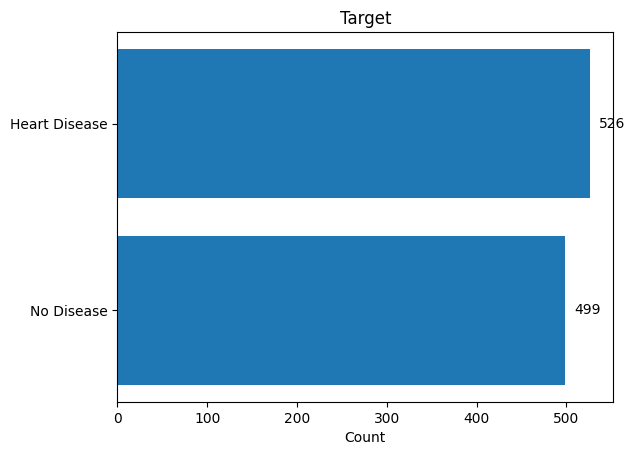

In [8]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

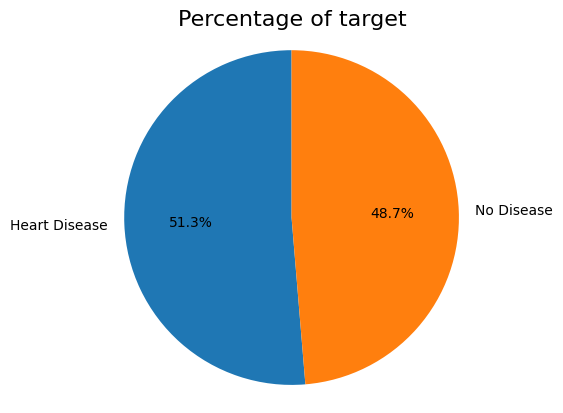

In [9]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() 

In [10]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [12]:
print(qualitative)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [13]:
print(quantitative)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


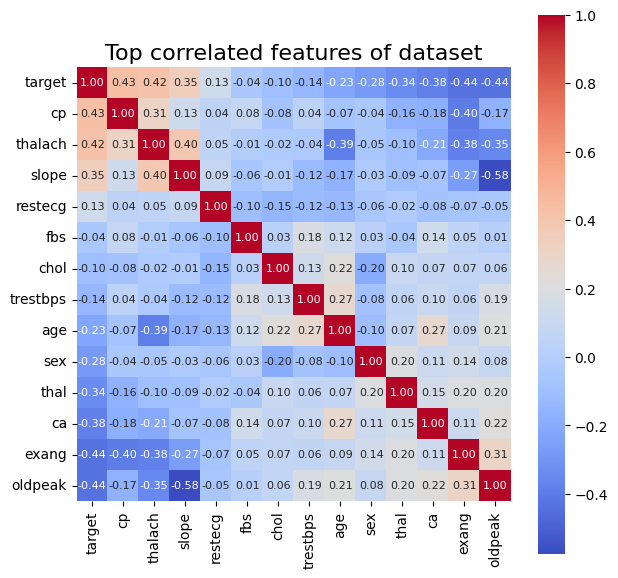

In [14]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':8})
plt.title('Top correlated features of dataset', size=16)
plt.show()

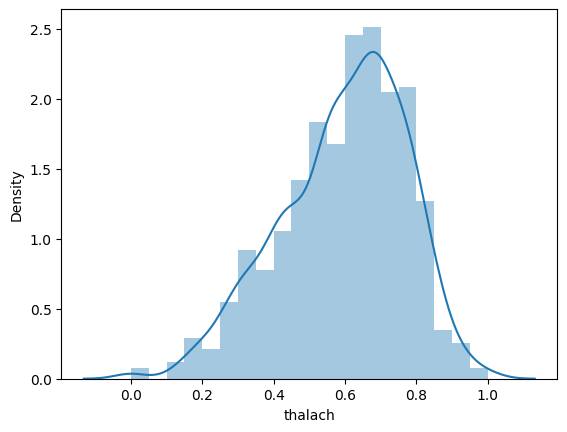

In [15]:
ax = sns.distplot(df['thalach'])

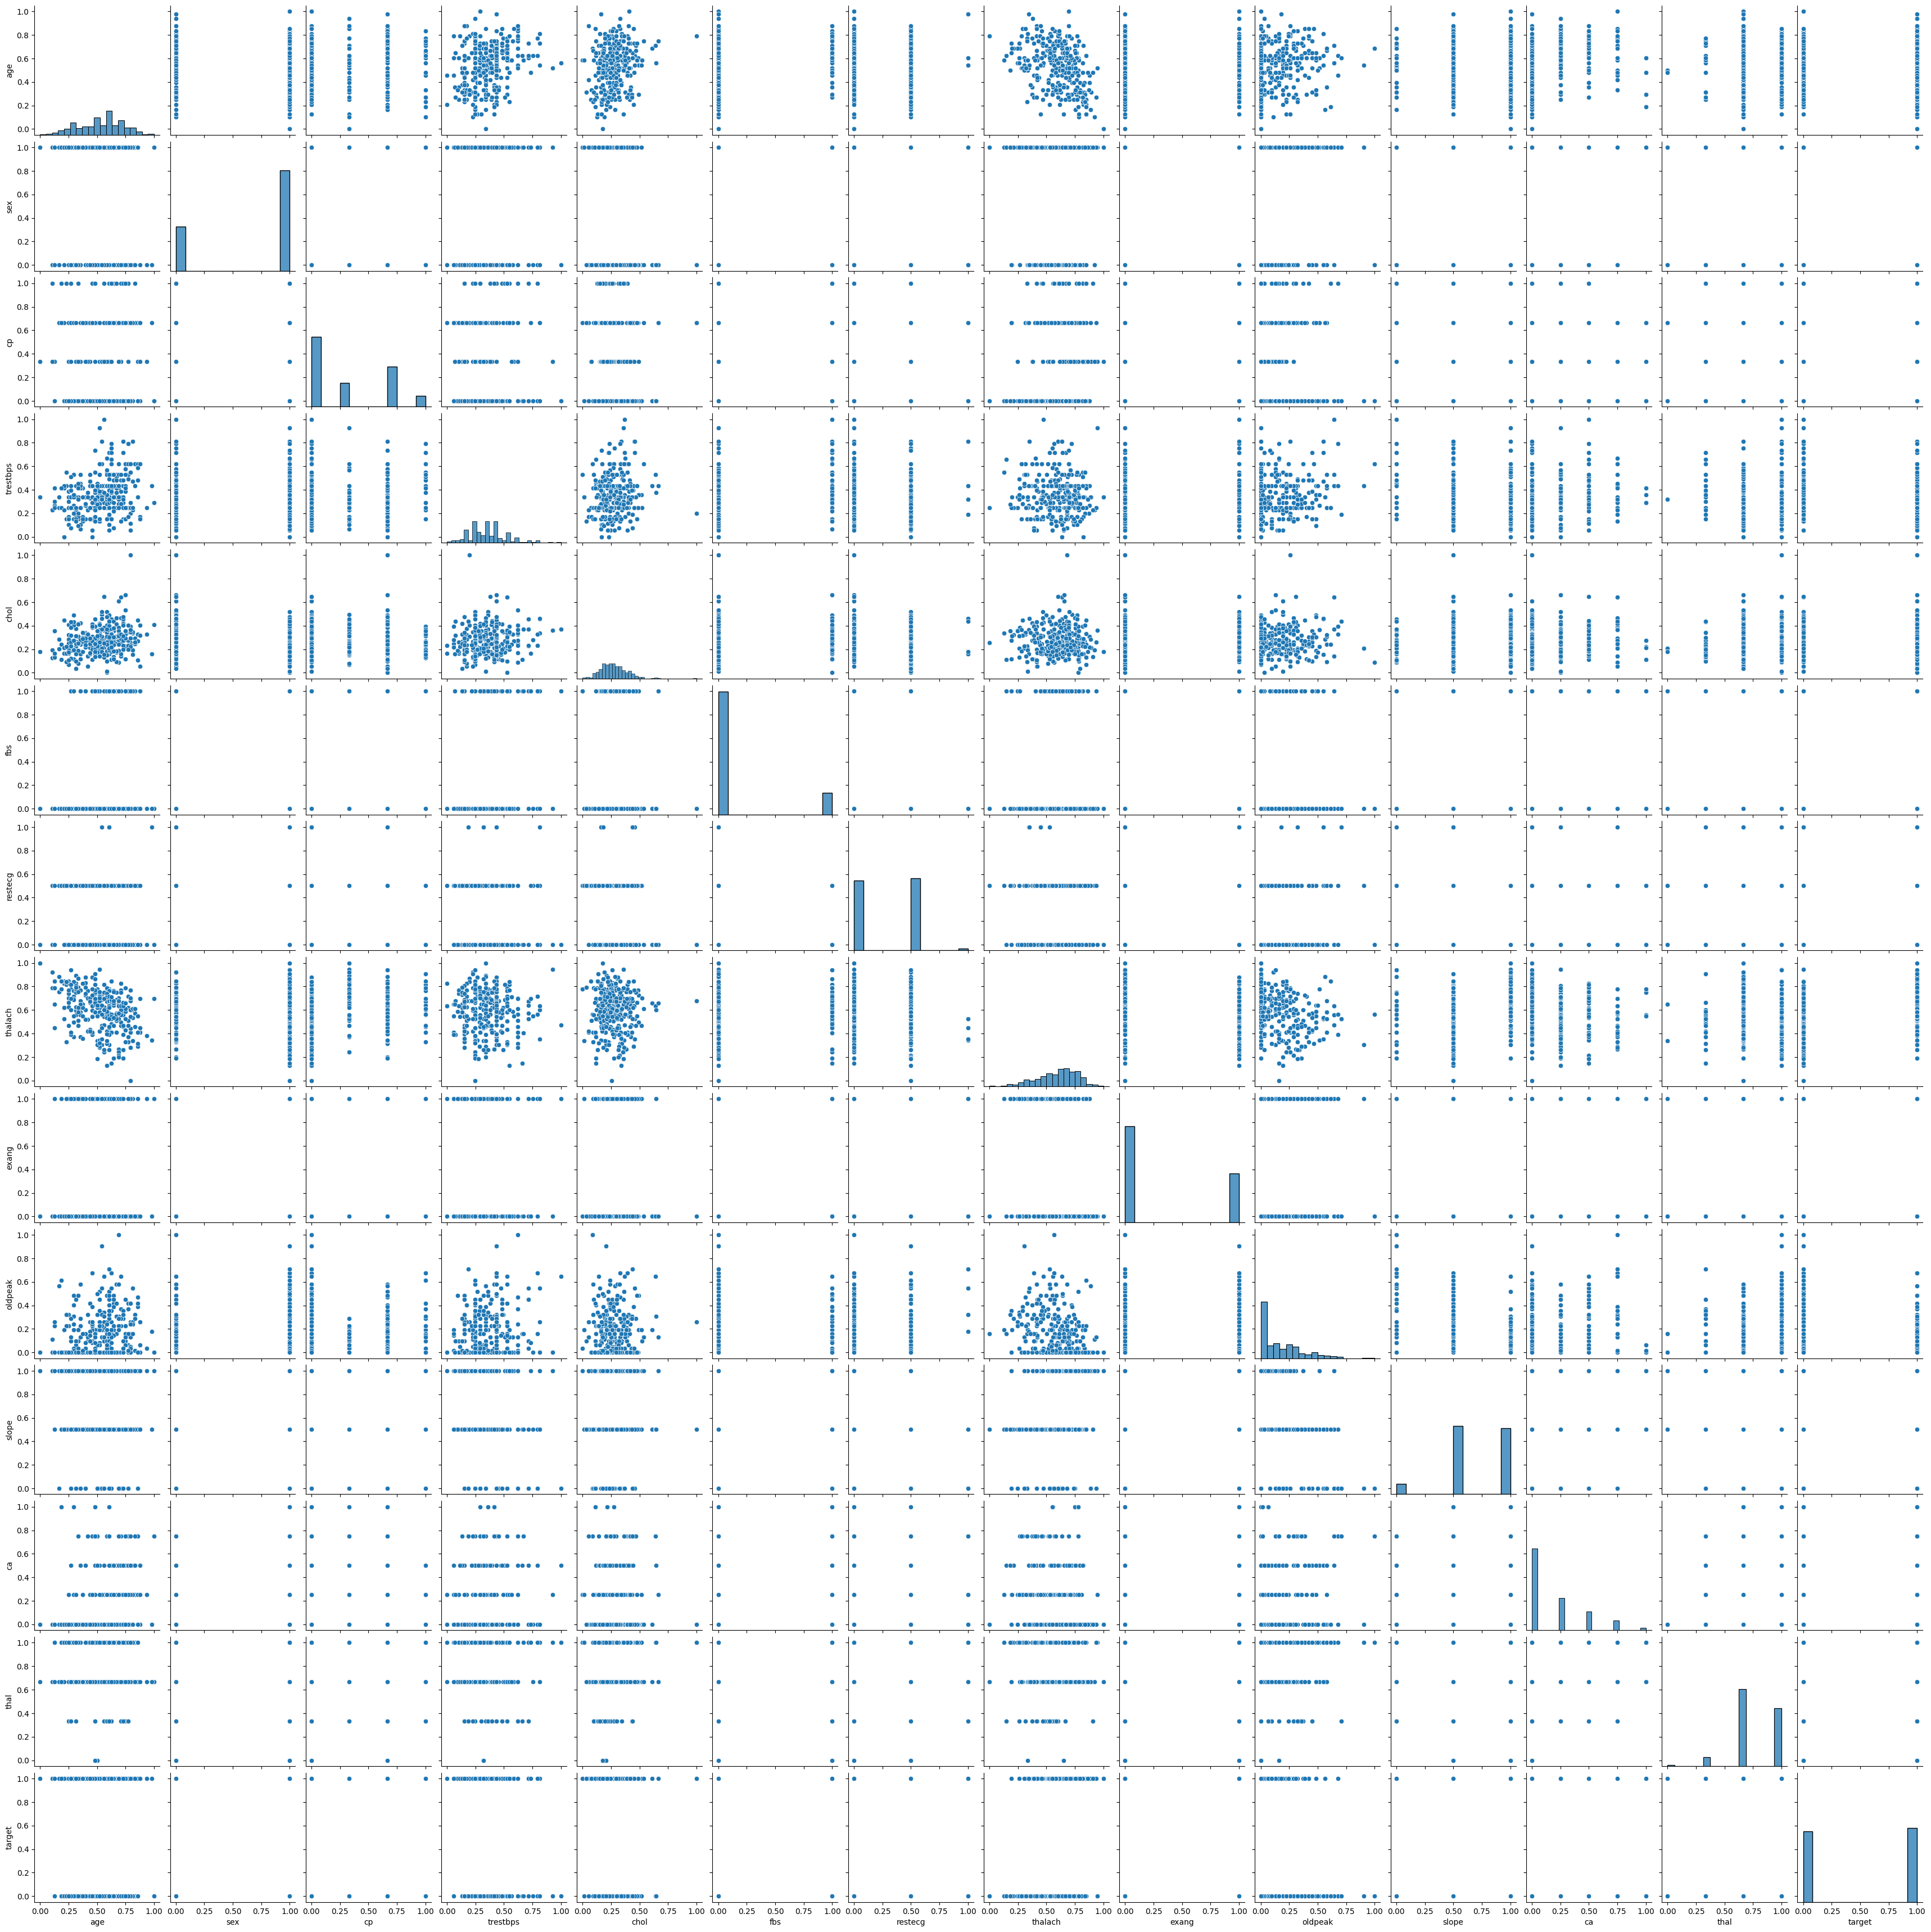

In [16]:
sns.pairplot(df)

In [17]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1025, 13) (1025,)


shape of X and y respectively (train) : (922, 13) (922,)
shape of X and y respectively (test) : (103, 13) (103,)
RandomForestClassifier
Training Score: 0.9793926247288504
Testing Score: 0.9320388349514563
   Predicted
0          1
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.5825242718446602
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        50
           1       0.88      1.00      0.94        53

    accuracy                           0.93       103
   macro avg       0.94      0.93      0.93       103
weighted avg       0.94      0.93      0.93       103



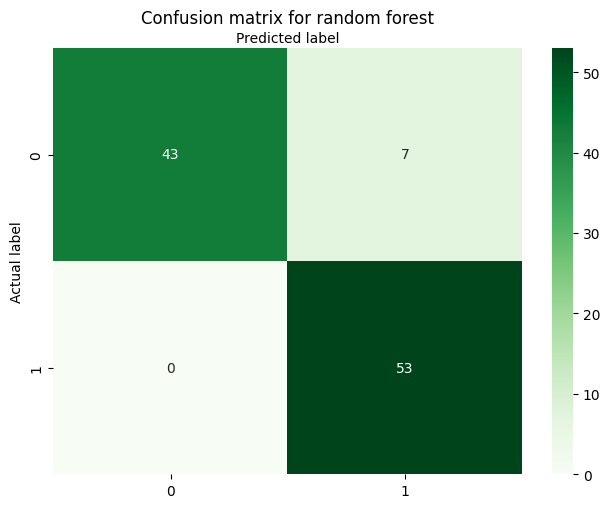

Testing Accuracy for random forest: 0.9320388349514563
Testing Sensitivity for random forest: 1.0
Testing Specificity for random forest: 0.8833333333333333
Testing Precision for random forest: 0.86


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(n_estimators=500, criterion='entropy',max_depth=6) 
modelrf.fit(X_train, y_train)
Y_pred = modelrf.predict(X_test)
score = modelrf.score(X_train, y_train)
print('Training Score:', score)
score = modelrf.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]
  
print('Testing Accuracy for random forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for random forest:',(TP/(TP+FN)))
print('Testing Specificity for random forest:',(TN/(TN+FP)))
print('Testing Precision for random forest:',(TP/(TP+FP)))


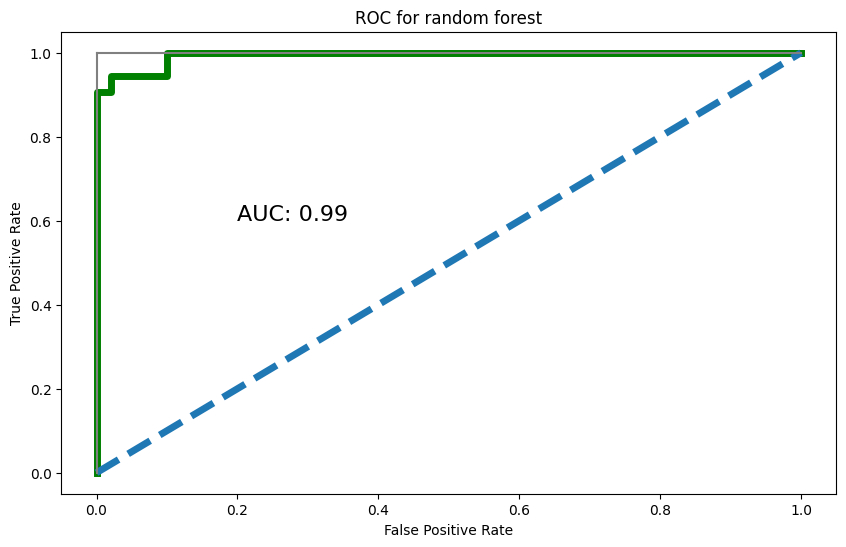

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = modelrf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)
DecisionTreeClassifier
Training Score: 0.925609756097561
Testing Score: 0.9219512195121952
   Predicted
0          1
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.551219512195122
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        98
           1       0.90      0.95      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



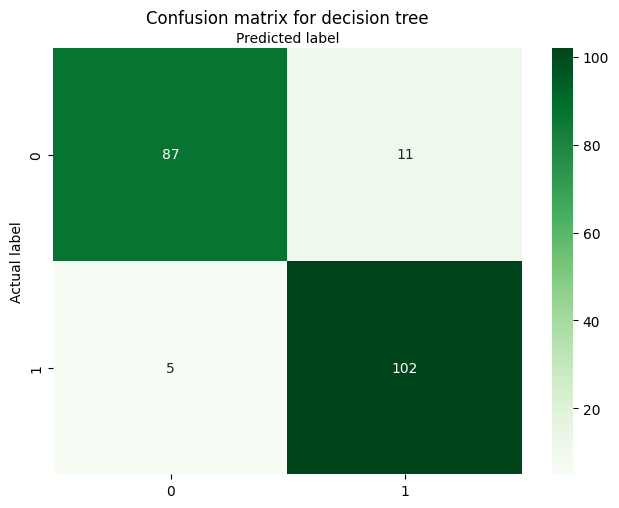

Testing Accuracy for decision tree: 0.9219512195121952
Testing Sensitivity for decision tree: 0.9456521739130435
Testing Specificity for decision tree: 0.9026548672566371
Testing Precision for decision tree: 0.8877551020408163

Decision Tree Plot:



[Text(0.5178571428571429, 0.9166666666666666, 'X[2] <= 0.167\nentropy = 0.999\nsamples = 1025\nvalue = [499, 526]'),
 Text(0.2916666666666667, 0.75, 'X[11] <= 0.125\nentropy = 0.804\nsamples = 497\nvalue = [375, 122]'),
 Text(0.17857142857142858, 0.5833333333333334, 'X[12] <= 0.833\nentropy = 1.0\nsamples = 219\nvalue = [112, 107]'),
 Text(0.09523809523809523, 0.4166666666666667, 'X[8] <= 0.5\nentropy = 0.833\nsamples = 125\nvalue = [33, 92]'),
 Text(0.047619047619047616, 0.25, 'X[7] <= 0.195\nentropy = 0.473\nsamples = 79\nvalue = [8, 71]'),
 Text(0.023809523809523808, 0.08333333333333333, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 0.3\nsamples = 75\nvalue = [4, 71]'),
 Text(0.14285714285714285, 0.25, 'X[6] <= 0.25\nentropy = 0.995\nsamples = 46\nvalue = [25, 21]'),
 Text(0.11904761904761904, 0.08333333333333333, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.16666666666666666, 0.08333333333333333, 'entropy = 0.8

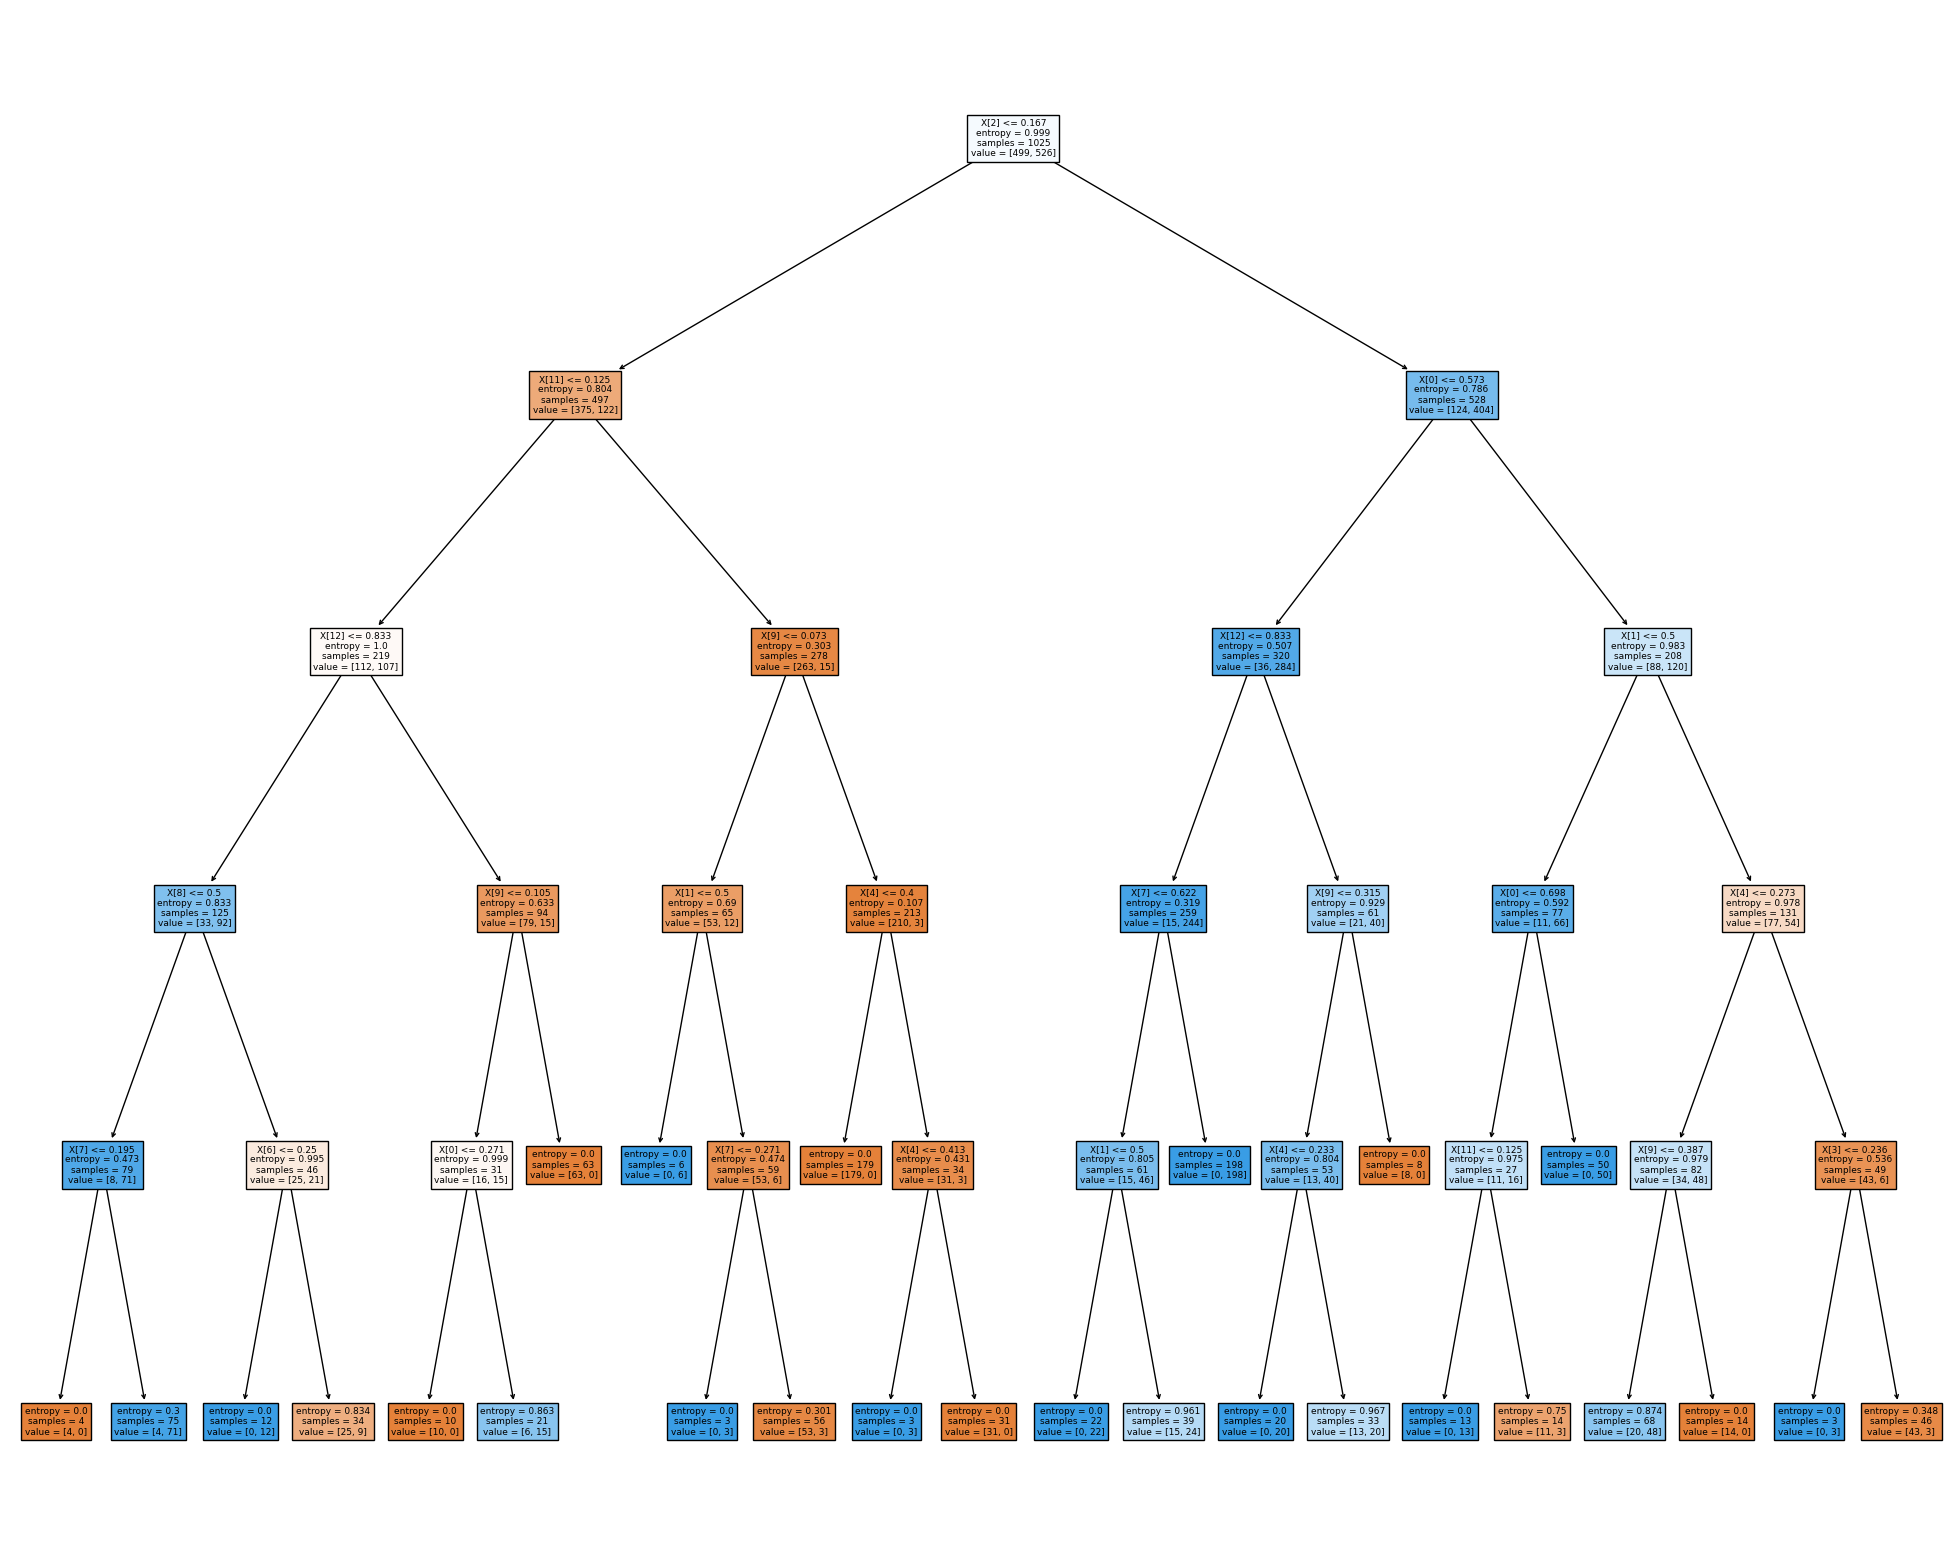

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5) 
model=decision_tree.fit(X_train, y_train)  
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]
  
print('Testing Accuracy for decision tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for decision tree:',(TP/(TP+FN)))
print('Testing Specificity for decision tree:',(TN/(TN+FP)))
print('Testing Precision for decision tree:',(TP/(TP+FP)))
print('\nDecision Tree Plot:\n')

from sklearn import tree
from sklearn import datasets
clf = model.fit(X, y)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True)

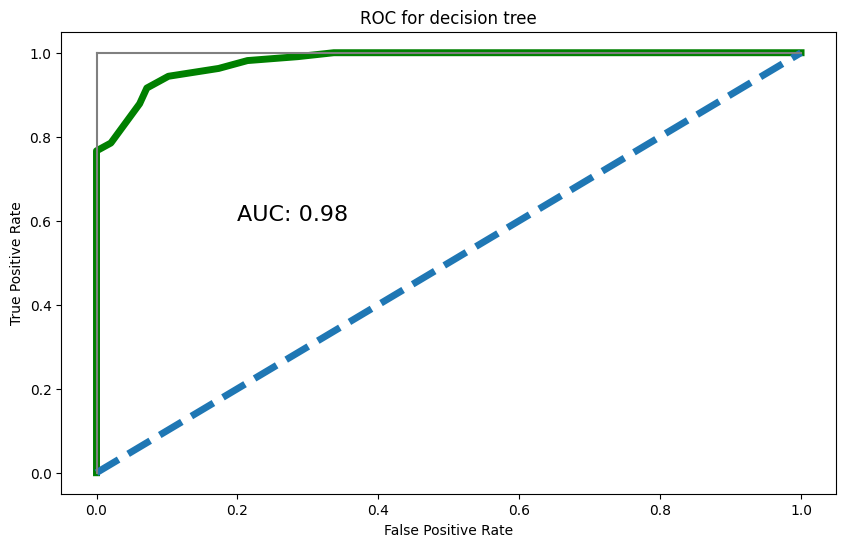

In [21]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)
KNeighborsClassifier
Training Score: 0.9036585365853659
Testing Score: 0.8926829268292683
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5707317073170731
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        98
           1       0.86      0.94      0.90       107

    accuracy                           0.89       205
   macro avg       0.90      0.89      0.89       205
weighted avg       0.90      0.89      0.89       205



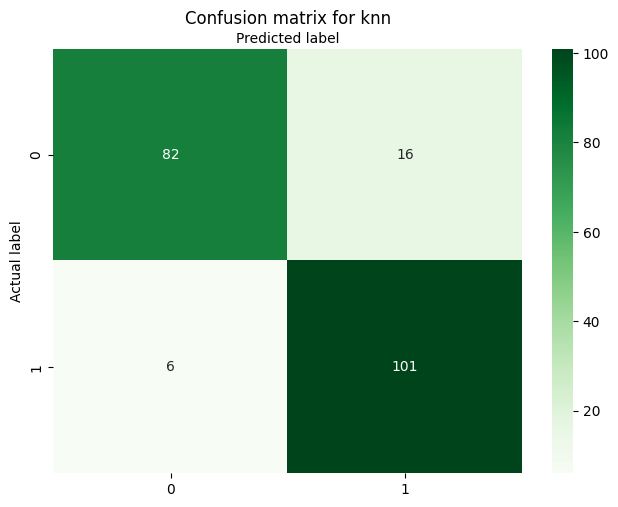

Testing Accuracy for knn: 0.8926829268292683
Testing Sensitivity for knn: 0.9318181818181818
Testing Specificity for knn: 0.8632478632478633
Testing Precision for knn: 0.8367346938775511


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knn')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]
  
print('Testing Accuracy for knn:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for knn:',(TP/(TP+FN)))
print('Testing Specificity for knn:',(TN/(TN+FP)))
print('Testing Precision for knn:',(TP/(TP+FP)))

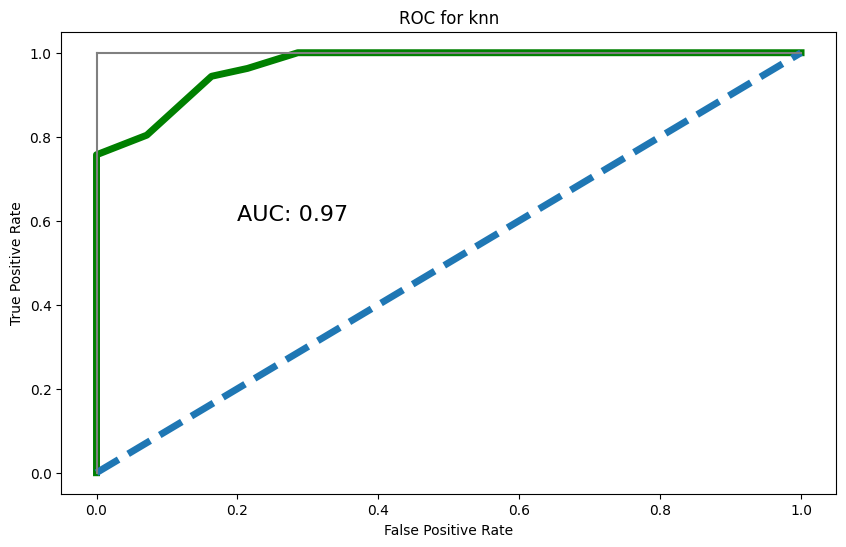

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knn')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)
NaiveBayesClassifier
Training Score: 0.8207317073170731
Testing Score: 0.8536585365853658
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5609756097560976
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



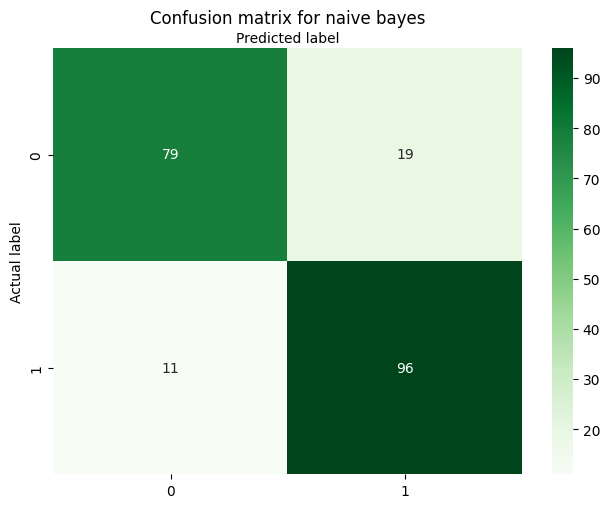

Testing Accuracy for naive bayes: 0.8536585365853658
Testing Sensitivity for naive bayes: 0.8777777777777778
Testing Specificity for naive bayes: 0.8347826086956521
Testing Precision for naive bayes: 0.8061224489795918


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

print('NaiveBayesClassifier')
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_nb = score
out_nb = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for naive bayes')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]
  
print('Testing Accuracy for naive bayes:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for naive bayes:',(TP/(TP+FN)))
print('Testing Specificity for naive bayes:',(TN/(TN+FP)))
print('Testing Precision for naive bayes:',(TP/(TP+FP)))

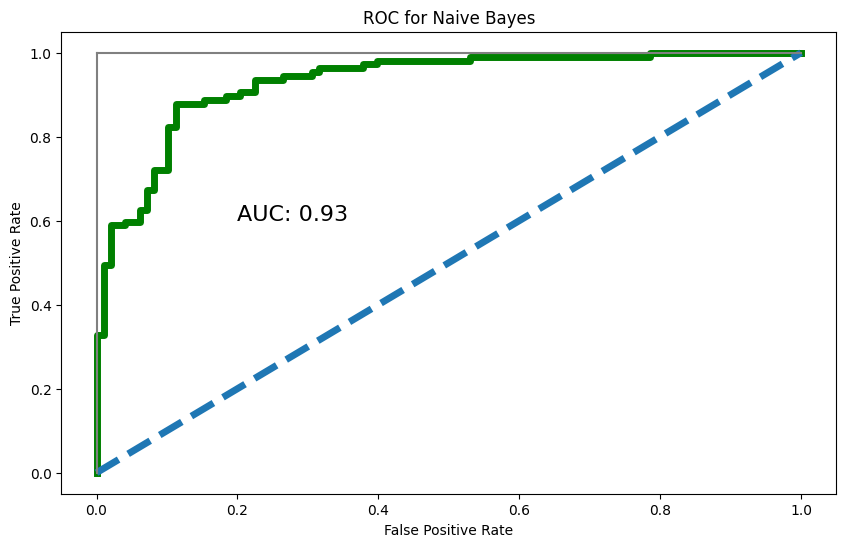

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for Naive Bayes')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

shape of X and y respectively (train) : (820, 13) (820,)
shape of X and y respectively (test) : (205, 13) (205,)
SVM Classifier
Training Score: 0.8719512195121951
Testing Score: 0.8975609756097561
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5560975609756098
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        98
           1       0.88      0.93      0.90       107

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



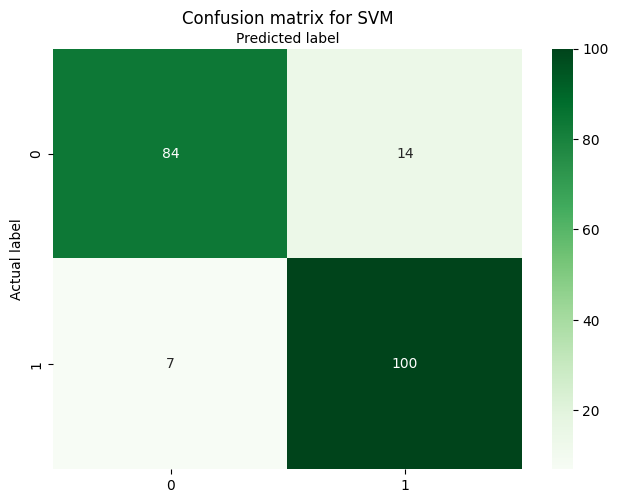

Testing Accuracy for SVM: 0.8975609756097561
Testing Sensitivity for SVM: 0.9230769230769231
Testing Specificity for SVM: 0.8771929824561403
Testing Precision for SVM: 0.8571428571428571


In [26]:
from numpy.ma.core import true_divide
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

print("SVM Classifier")
from sklearn.svm import SVC
svm=SVC(C=6,gamma=0.1,kernel='rbf',probability=True)
model=svm.fit(X_train,y_train)
Y_pred=model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_svm = score
out_svm = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

TP=conf_matrix[0][0]
TN=conf_matrix[1][1]
FN=conf_matrix[1][0]
FP=conf_matrix[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))


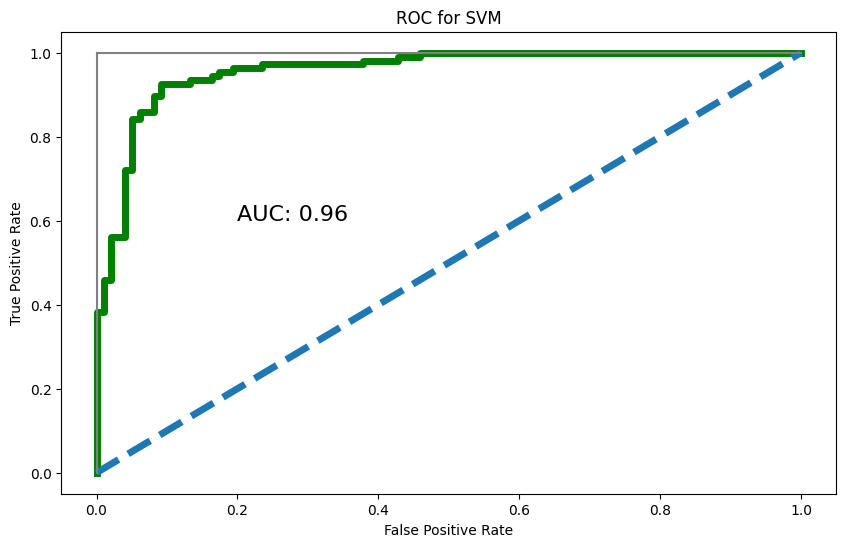

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for SVM')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

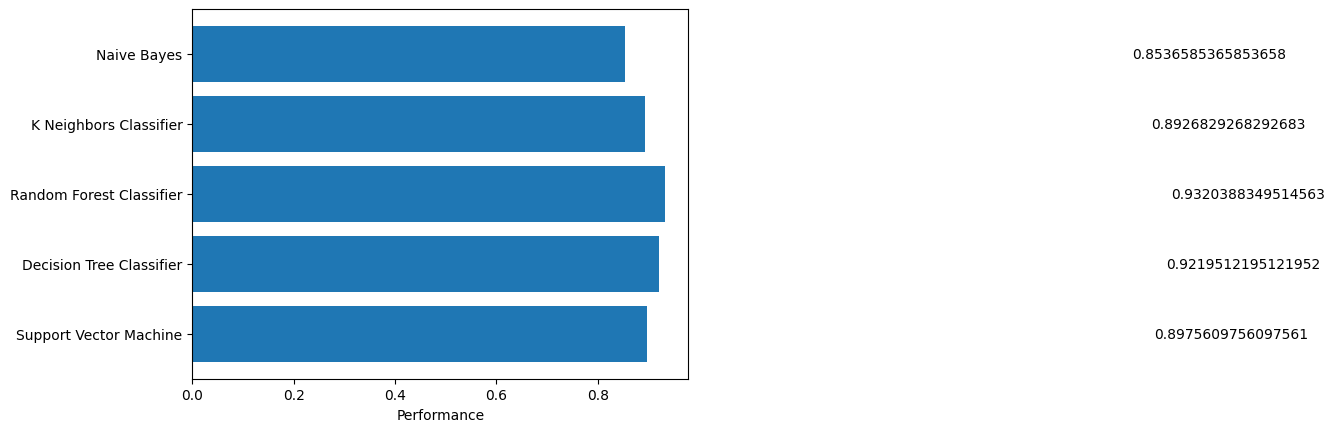

In [28]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Naive Bayes', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine')
y_pos = np.arange(len(algorithms))
x = (score_nb, score_knc, score_rfc, score_dtc, score_svm) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [29]:
import pickle
filename='Random_Forest.sav'
pickle.dump(modelrf,open(filename,'wb'))

loaded_model = pickle.load(open('Random_Forest.sav','rb'))